# Projeto DailyEnglish: Seu Dia a Dia Virando Vocabulário de Inglês com IA para o Anki! 📚✨
Este notebook Colab é o coração do DailyEnglish: um projeto que transforma seu resumo diário em vocabulário personalizado de inglês.

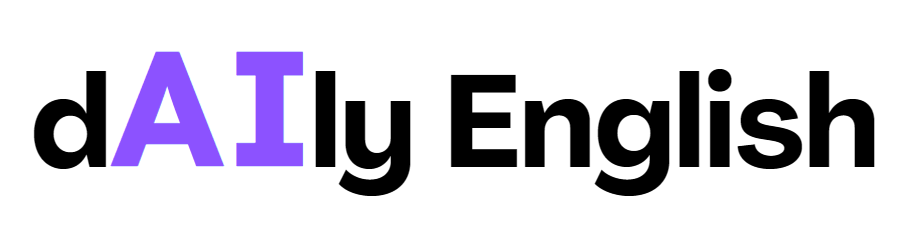

## Como Funciona? 🤔
Você descreve seu dia em um texto simples.
A Inteligência Artificial (Gemini), neste notebook, irá:
- Analisar seu texto: Entender as atividades e o contexto.
- Extrair vocabulário: Identificar os termos e frases mais relevantes.
- Gerar flashcards: Criar uma lista de flashcards com traduções em inglês, em csv para importar no Anki.

O objetivo final é que essa lista de flashcards seja diretamente importável para o Anki, combinando a personalização com a eficiência da repetição espaçada.

In [ ]:
# 🚀 Instalando as Bibliotecas Necessárias

!pip install -q google-genai

In [ ]:
# Configuração para o display em MarkDown

from IPython.display import display
from IPython.display import Markdown
import textwrap

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Configuração da API Key

import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

In [ ]:
# Importação da Biblioteca Genai

from google import genai
from google.genai import types

In [ ]:
# Configuração do cliente

model_name = "gemini-2.5-flash-preview-04-17"

client = genai.Client()

config = types.GenerateContentConfig(
            system_instruction="""
            Você é um assistente de aprendizado de idiomas especializado em extrair vocabulário e frases de descrições diárias, e formatá-lo diretamente para flashcards do Anki.

            Recebi um resumo em português das atividades de um dia. Sua tarefa é analisar o texto e extrair de 8 a 20 dos termos, frases curtas e expressões mais importantes e úteis para alguém que está aprendendo inglês.

            Para cada item extraído, você deve gerar **DUAS linhas** separadas no formato CSV (`frente;verso`), conforme as regras abaixo:

            1.  **Primeira Linha:** A frente deve ser o termo em português e o verso a tradução em inglês.
            2.  **Segunda Linha:** A frente deve ser a tradução em inglês e o verso o termo em português.

            Garanta que cada par de linhas (Português-Inglês e Inglês-Português) se refira ao *mesmo* termo ou frase extraído.

            Não inclua cabeçalhos, introduções, nem qualquer texto além das linhas CSV.

            Exemplo de formato CSV desejado (para dois termos):
            dia agitado;busy day
            busy day;dia agitado
            aula de imersão;immersion class
            immersion class;aula de imersão
            programação em Python;Python programming
            Python programming;programação em Python'
            """,
            temperature=0.3,
    )

In [ ]:
#Pega o resumo do dia e calcula a resposta

resumo = ""

while True:
  resumo = input("Insira um resumo do seu dia: ")
  if (input != ""):
    break;

response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents=resumo,
    config=config
)

Insira um resumo do seu dia: Hoje eu comi arroz e peidei muito


In [ ]:
# Salva a resposta em um arquivo .csv
import csv

filename = "flashcards.csv"

with open(filename, 'w', newline='') as csvfile:
    csvfile.write(response.text)

print(f"Seus flashcards foram gerados com Sucesso e já podem ser importados para o Anki! \n \n")
display(to_markdown(response.text))

Seus flashcards foram gerados com Sucesso e já podem ser importados para o Anki! 
 



> arroz;rice
> rice;arroz
> peidei muito;I farted a lot
> I farted a lot;peidei muito
